# Matplotlib

Similar to NumPy and other Python DS/ML packages, Matplotlib also has import conventions. For example, to have inline plots in Jupyter notebooks, we use `%pylab` magic command:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Newer versions of packages may show a warning that above magic command will soon be deprecated.

Instead, you can use the following magic command:
```python
%matplotlib inline
```

In a Python script we can do:
```python
from matplotlib import pyplot as plt
```

## Figures

The basic plotting entity in Matplotlib is `figure`:

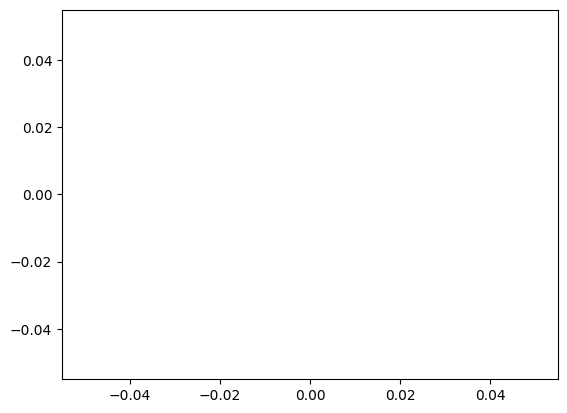

In [2]:
plt.figure()
plt.plot()
plt.show()

We created a figure (`plt.figure()`), plotted nothing on it (`plt.plot()`), and displayed it (`plt.show()`). Note, that `plt.show()` is not needed if you create a single figure, as Jupyter will display it anyway.

We can specify figure dimensions as well:

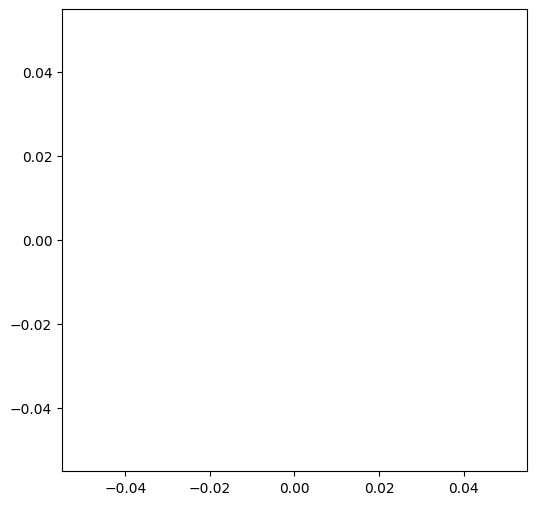

In [3]:
# Figure can have size (in inches)
plt.figure(figsize=(6,6))
plt.plot();

We see several elements of the plots already:

- axes (do not confuse with ax*i*s),
- (major) ticks,
- (major) tick labels.

Note, that Matplotlib uses default ranges for both `X` axis and `Y` axis. Let's plot something:

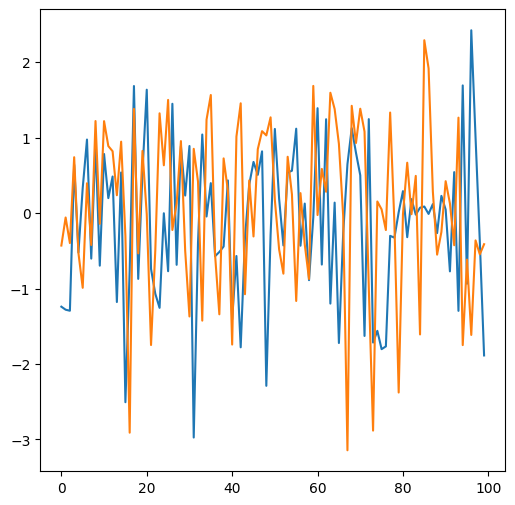

In [6]:
plt.figure(figsize=(6,6))
plt.plot(np.random.randn(100))
plt.plot(np.random.randn(100));

As we can see, `plt.plot` makes line plots, and has some set of colors to choose from. Matplotlib also adjusted the ranges to fit the actual data. There's another way to achieve the same by using axes object directly (used very often when dealing with subplots):

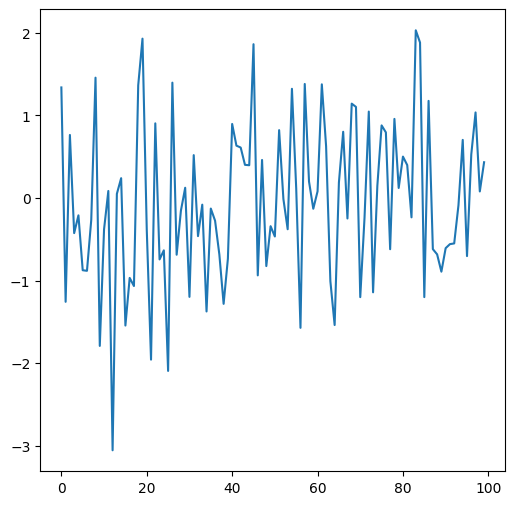

In [7]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()  # Get current axes
ax.plot(np.random.randn(100));

Our plot doesn't have a title, and labels for `X` axis and `Y` axis. Let's add some:

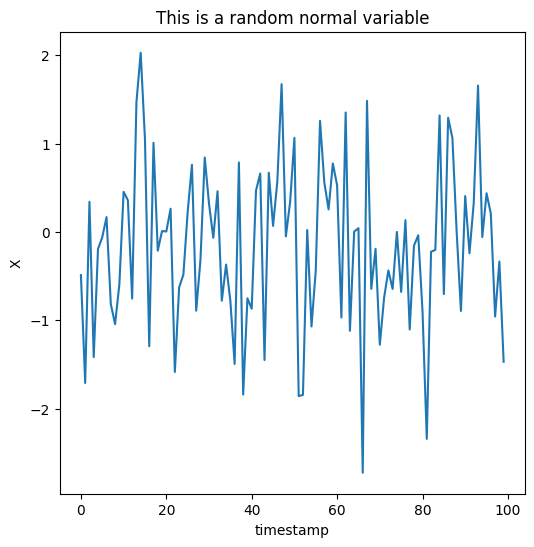

In [8]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()  # Get current axes

# Note, that plot itself is an object you can work with
line_plot = ax.plot(np.random.randn(100))
ax.set_title("This is a random normal variable")
ax.set_xlabel("timestamp")
ax.set_ylabel("X");

The same plot can be created directly with `plt` as the following:

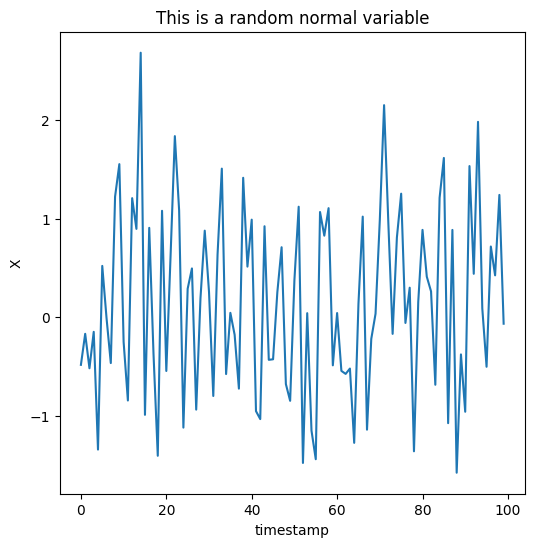

In [9]:
fig = plt.figure(figsize=(6,6))

# Note, that plot itself is an object you can work with
line_plot = plt.plot(np.random.randn(100))
plt.title("This is a random normal variable")
plt.xlabel("timestamp")
plt.ylabel("X");

Although you will rarely use this feature directly, you can modify `line_plot` (and other types of plots as well) directly:

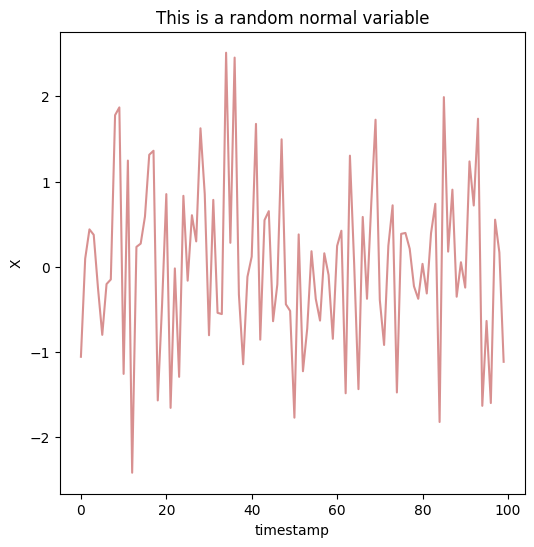

In [10]:
fig = plt.figure(figsize=(6,6))

# Note, that plot itself is an object you can work with
line_plot = plt.plot(np.random.randn(100))

# Change the color and alpha
l = line_plot[0]
l.set_alpha(0.5)
l.set_color("firebrick")

plt.title("This is a random normal variable")
plt.xlabel("timestamp")
plt.ylabel("X");

`plt.plot` can plot multiple lines at once, hence, `line_plot` is a list (with only one element in this case).

## Line plots

Let's consider line plots in more details. First let's generate some data:

In [11]:
NUM_POINTS = 1000

In [12]:
x = np.linspace(0, 4.*np.pi, NUM_POINTS)
y = np.sin(x) + np.random.normal(0, 0.1, NUM_POINTS)
yy = np.cos(x) + np.random.normal(0, 0.1, NUM_POINTS)

Note, that we never imported NumPy. But how do we have `np`?

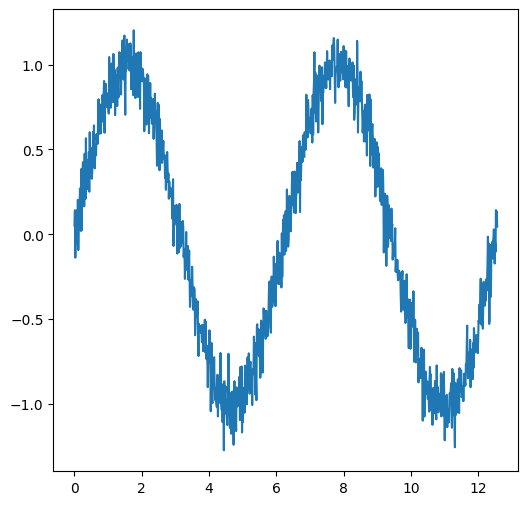

In [13]:
plt.figure(figsize=(6,6))
plt.plot(x, y);

Let's add more details to the plot:

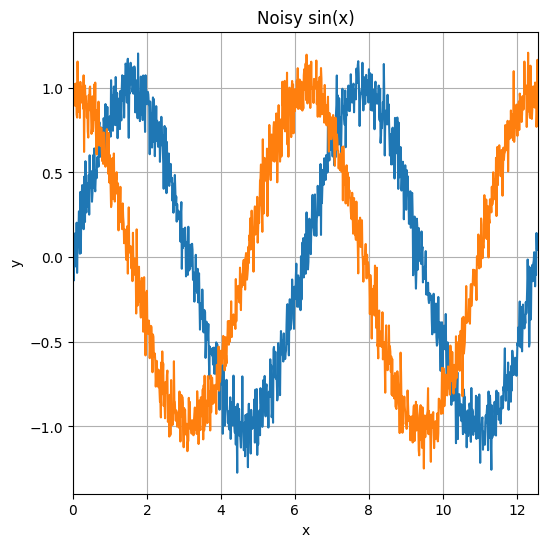

In [14]:
plt.figure(figsize=(6,6))

# Note the notation for plotting multiple lines at once
plt.plot(x, y, x, yy)

# Add labels
plt.xlabel('x')
plt.ylabel('y')

# Turn grid on
plt.grid(True)

# Set X axis range manually
plt.xlim(0, 4*np.pi)

# Add title
plt.title("Noisy sin(x)");

Our plot looks much better than default, but still it's to simplistic. Matplotlib has a set of predefined styles (i.e. sets of color ramps, font sizes, line styles and so on) we can use. Let's take one from `ggplot` package of `R` language:

In [15]:
plt.style.use('ggplot')

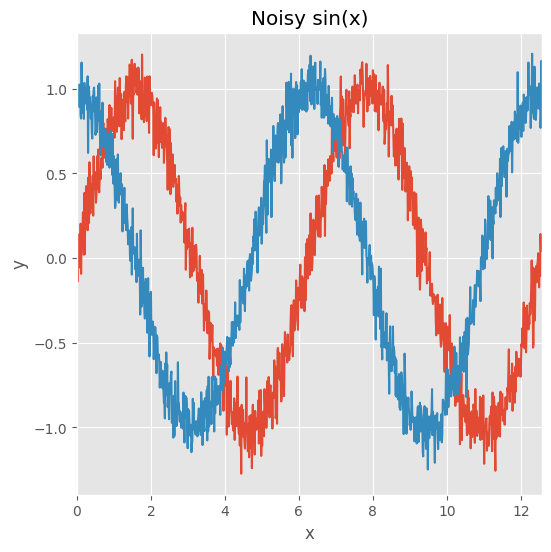

In [16]:
plt.figure(figsize=(6,6))

plt.plot(x, y, x, yy)

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

plt.xlim(0, 4*np.pi)

plt.title("Noisy sin(x)");

Let's play with styling further:

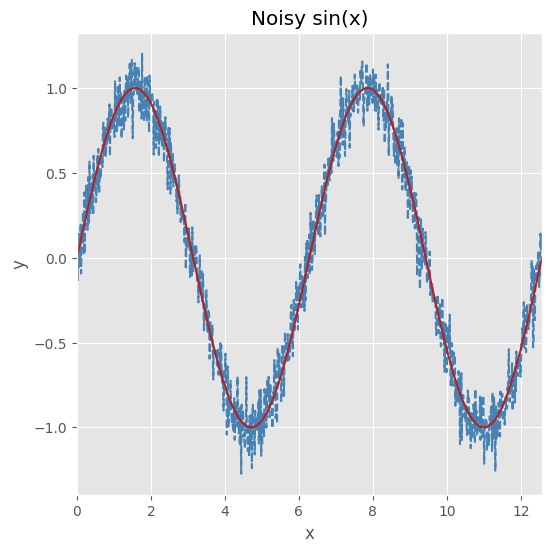

In [17]:
plt.figure(figsize=(6,6))

# Change line style to dash and add custom color
plt.plot(x, y, '--', c='steelblue')
plt.plot(x, np.sin(x), c='firebrick')

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

plt.xlim(0, 4*np.pi)

plt.title("Noisy sin(x)");

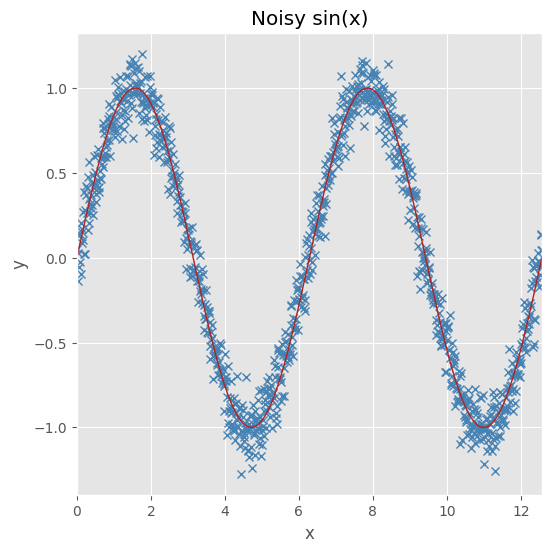

In [20]:
plt.figure(figsize=(6,6))

# Change line style to crosses and specify markersize
plt.plot(x, y, 'x', markersize=6, c='steelblue')
plt.plot(x, np.sin(x), c='firebrick', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

plt.xlim(0, 4*np.pi)

plt.title("Noisy sin(x)");

### Legends

One important element we're missing is plot legend. We can add one by labeling each **artist** (i.e. line plot, bar plot, etc.):

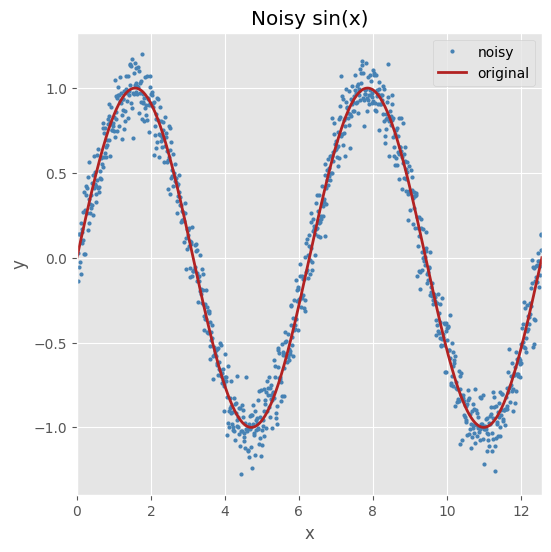

In [21]:
plt.figure(figsize=(6,6))

# Adding a label
plt.plot(x, y, 'o', markersize=2, c='steelblue', label='noisy')
plt.plot(x, np.sin(x), c='firebrick', linewidth=2, label='original')

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

plt.xlim(0, 4*np.pi)

# Placing legend manually
# Location 0 means "best" (based on data plotted)
plt.legend(loc=0)

plt.title("Noisy sin(x)");

This plot looks way better compared to the original and we can use in a report or slides.

## Scatter plots

Scatter plot is another type of plot, which visualizes a pair of data elements with neither having any specific ordered (like time, of spatial coordinate) meaning:

In [22]:
x = np.random.randn(NUM_POINTS)
y = x + np.random.normal(0, 0.1, NUM_POINTS)

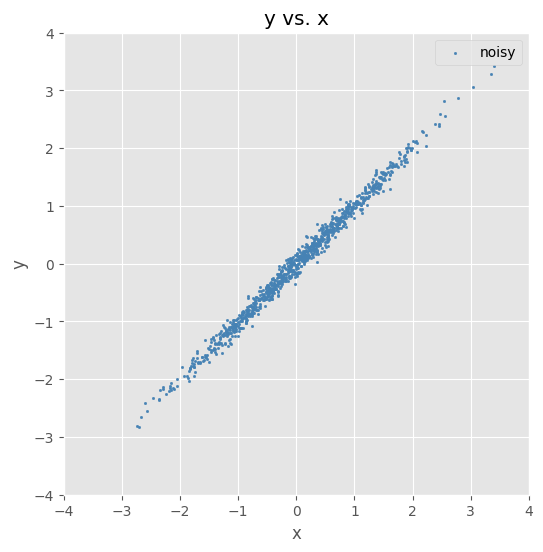

In [26]:
plt.figure(figsize=(6,6))

# Note that use short s instead of markersize
plt.scatter(x, y, marker='o', s=2, c='steelblue', label='noisy')

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.legend(loc=0)

plt.title("y vs. x");

We can set marker sized for each point:

In [24]:
sz = np.random.randint(2, 32, size=(NUM_POINTS,))

In [25]:
sz.shape

(1000,)

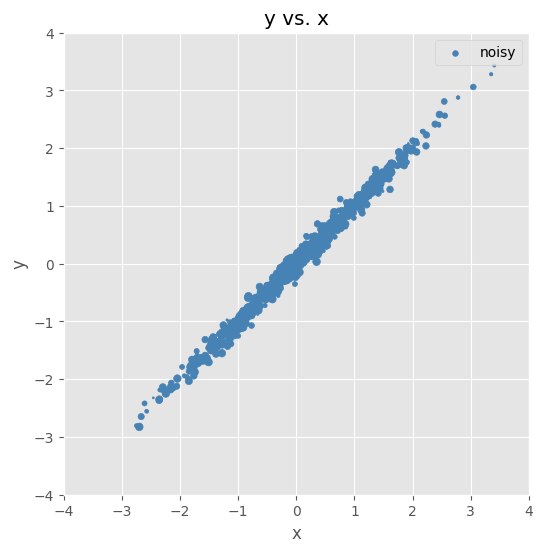

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, marker='o', s=sz, c='steelblue', label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x");

We can add color to each point as well:

In [32]:
colors = x + np.random.normal(0, 0.1, size=(NUM_POINTS,))

In [33]:
colors

array([-1.14519486e+00, -6.24999282e-01, -3.22655583e-01, -7.61544958e-01,
        1.31173740e+00,  4.59998479e-01, -9.33379473e-01, -2.03664858e-01,
        7.78085132e-01,  5.72110424e-01, -5.25940731e-01, -7.87400259e-02,
       -1.28917049e-01, -6.24630927e-01, -1.04622467e-01,  2.69278072e-01,
        6.02940407e-01,  1.13271143e+00, -8.85671184e-01,  1.03051184e+00,
        1.26957202e+00, -1.40055845e+00,  1.10333121e-01,  8.39545716e-01,
       -1.86977784e-01,  1.97409231e-01, -1.03080845e+00,  4.72043648e-01,
        1.93674053e+00,  4.42358902e-01,  1.13602173e+00,  2.24905625e-01,
        2.26803540e+00, -2.33088316e-01,  2.74350738e-01, -3.11566441e-01,
       -2.38424977e-01,  3.01456913e+00,  3.56429015e-01, -1.09331116e-01,
       -1.83317451e+00,  5.12633928e-01,  6.08202847e-01, -2.40310681e-01,
       -9.85786285e-02,  2.13312969e+00,  1.45466713e-01, -9.67267187e-01,
       -1.36297132e+00,  9.39859493e-01, -1.25075858e+00,  6.50552857e-01,
       -1.43999829e-01,  

The "colors" are not real colors but some floating point numbers. That's ok, as Matplotlib has a lot of predefined **color maps**, and will **map** those numbers to selected color map:

Text(0.5, 1.0, 'y vs. x')

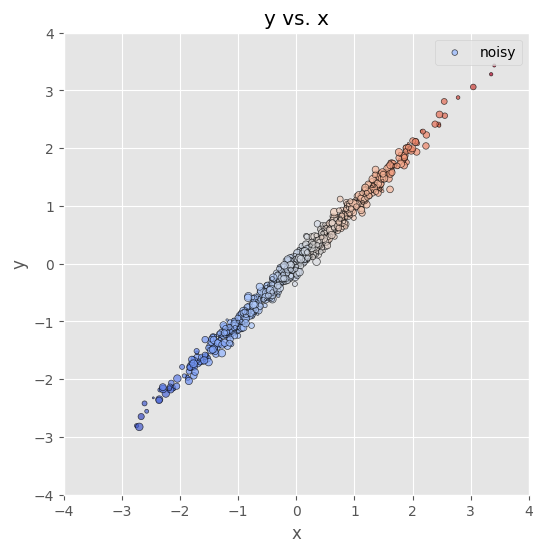

In [34]:
plt.figure(figsize=(6,6))

# We also add edgecolor here
plt.scatter(x, y, marker='o', alpha=0.7, s=sz, c=colors, edgecolor='k',
            cmap=plt.cm.coolwarm, label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x")

We can visualize the mapping itself:

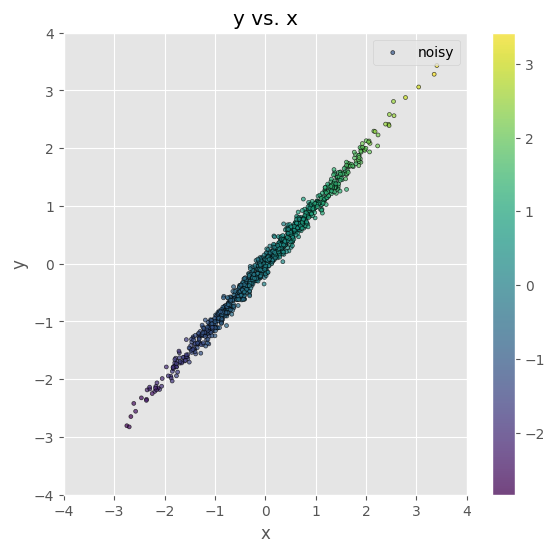

In [37]:
plt.figure(figsize=(6.5,6))

plt.scatter(x, y, marker='o', alpha=0.7, s=32, c=colors,
            edgecolor='k', label='noisy')

# You can vis the colormap if some mapping was actually created
plt.colorbar()

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x");

The plot above has a bit too much air around, let's tighten it up:

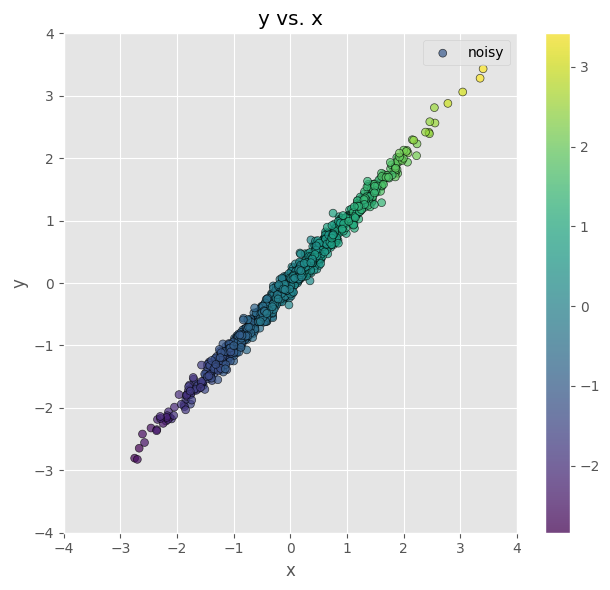

In [38]:
plt.figure(figsize=(6.5,6))

# Now Matplotlib uses the default Viridis colormap
plt.scatter(x, y, marker='o', alpha=0.7, s=32, c=colors,
            edgecolor='k', label='noisy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x")
plt.tight_layout();

## Histograms

Histograms are indispensable in analysing data distributions. They are easy to create in Matplotlib.

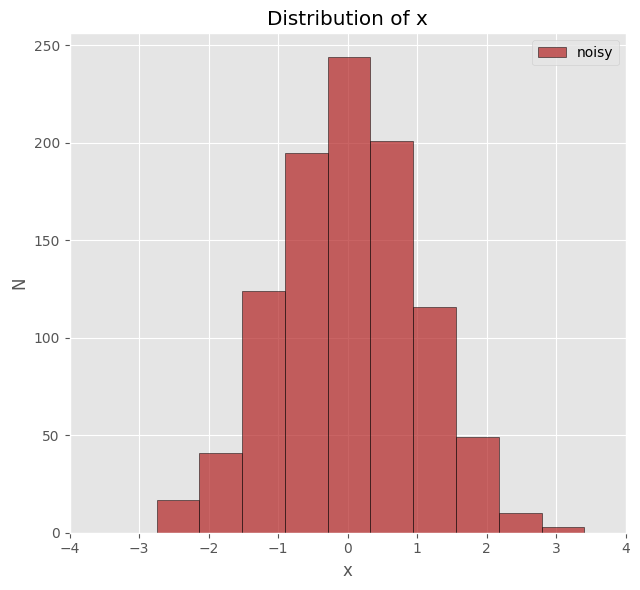

In [39]:
plt.figure(figsize=(6.5,6))

plt.hist(x, alpha=0.7, color='firebrick', edgecolor='k', label='noisy')

plt.xlabel('x')
plt.ylabel('N')

plt.grid(True)

plt.xlim(-4, 4)

plt.legend(loc=0)

plt.title("Distribution of x")
plt.tight_layout();

Matplotlib selected some default number of bins and calculated the histogram range from the data. Let's adjust those:

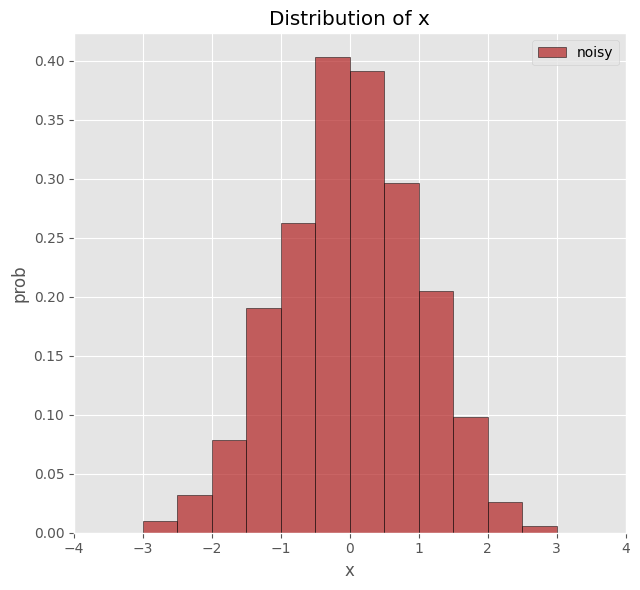

In [41]:
plt.figure(figsize=(6.5,6))

# We laso switch from counts to density histogram
plt.hist(x, bins=12, range=(-3, 3),
         density=True,
         alpha=0.7, color='firebrick', edgecolor='k', label='noisy')

plt.xlabel('x')
plt.ylabel('prob')

plt.grid(True)
plt.xlim(-4, 4)

plt.legend(loc=0)

plt.title("Distribution of x")
plt.tight_layout();

We can plot not a distribution, but a cumulative distribution:

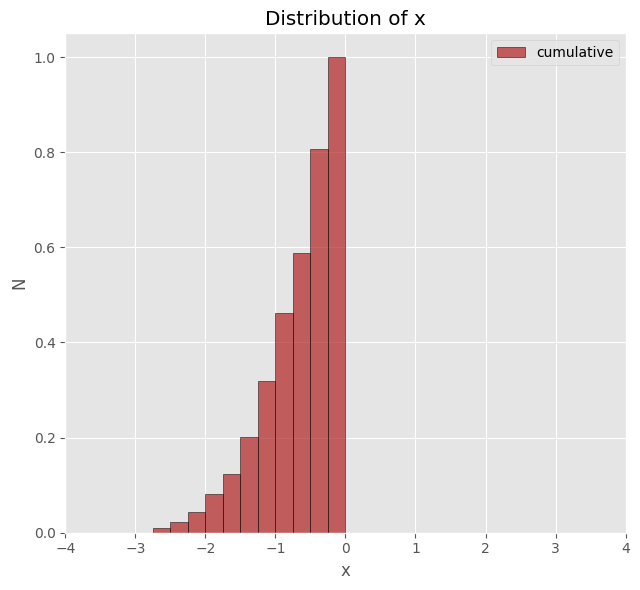

In [44]:
plt.figure(figsize=(6.5,6))
plt.hist(x, bins=12, range=(-3, 3),
         cumulative=True,
         density=True, alpha=0.7, color='firebrick',
         edgecolor='k', label='cumulative')
plt.xlabel('x')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.legend(loc=0)
plt.title("Distribution of x")
plt.tight_layout();

Or create a stacked histogram:

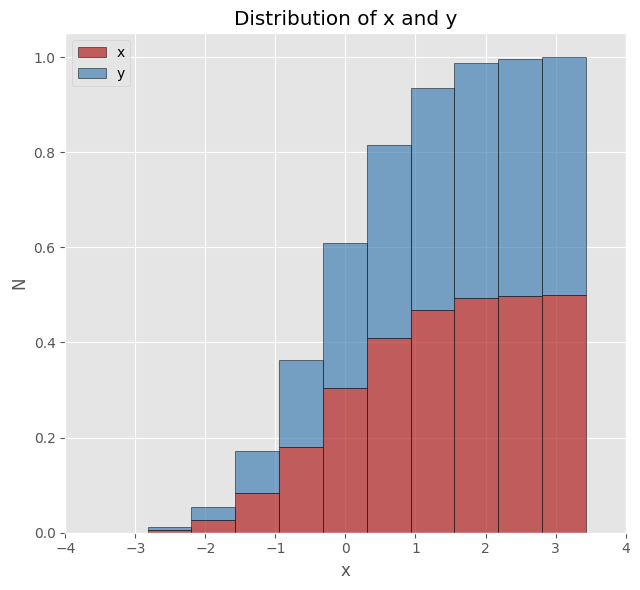

In [59]:
plt.figure(figsize=(6.5,6))
plt.hist([x, y], alpha=0.7, color=['firebrick', 'steelblue'],
         histtype='barstacked',
         cumulative=True,
         density=True,
         edgecolor='k', label=('x', 'y'))
plt.xlabel('x')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.legend(loc=0)
plt.title("Distribution of x and y")
plt.tight_layout();

Btw, font size for title looks weird, let's make it smaller (default is 14):

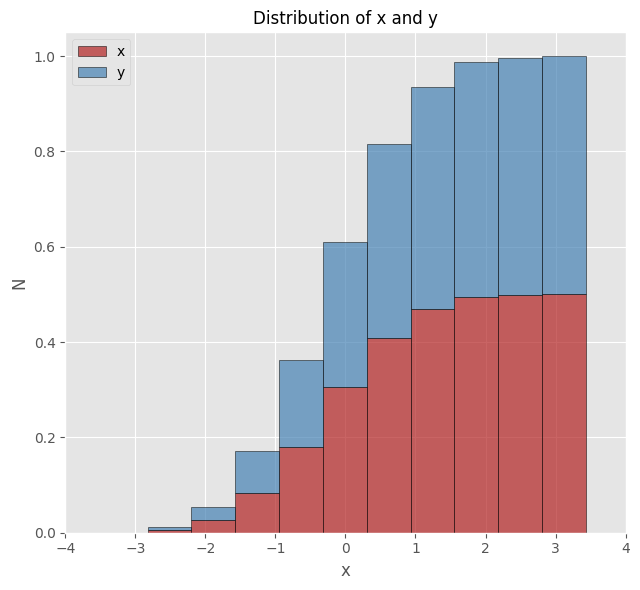

In [46]:
plt.figure(figsize=(6.5,6))
plt.hist([x, y], alpha=0.7, color=['firebrick', 'steelblue'],
         histtype='barstacked',
         cumulative=True, density=True,
         edgecolor='k', label=('x', 'y'))
plt.xlabel('x')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.legend(loc=0)
plt.title("Distribution of x and y", fontsize=12)
plt.tight_layout();

## Boxplots

Another way of visualizing data distributions is with box plots:

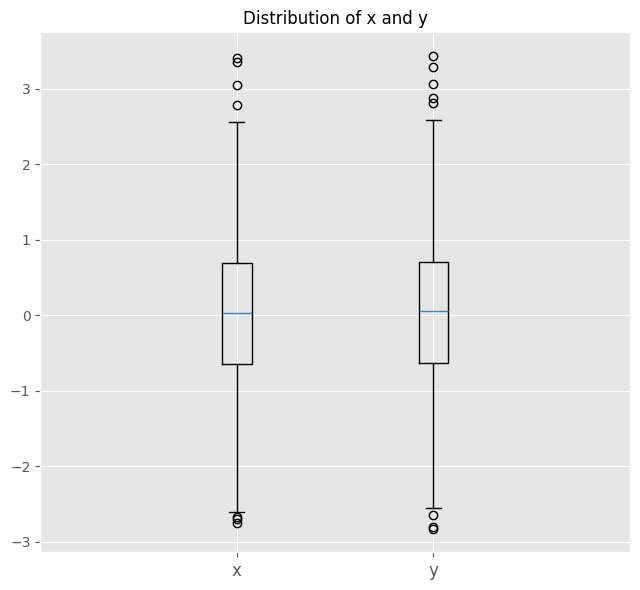

In [47]:
plt.figure(figsize=(6.5,6))
plt.boxplot([x, y])
plt.grid(True)
plt.xlim(0, 3)
plt.title("Distribution of x and y", fontsize=12)

# Note, how we set ticks
plt.xticks([1, 2], ['x', 'y'], fontsize=12)
plt.tight_layout();

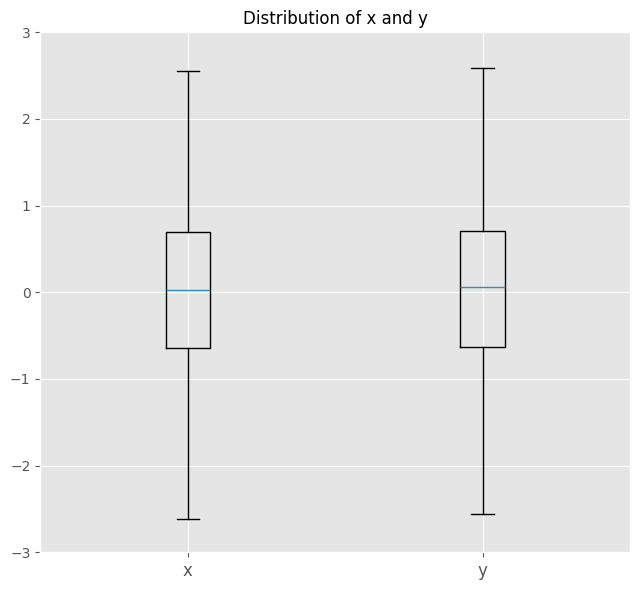

In [53]:
plt.figure(figsize=(6.5,6))
plt.boxplot([x, y], showfliers=False)
plt.grid(True)
plt.ylim(-3, 3)
plt.title("Distribution of x and y", fontsize=12)

# Note, how we set ticks
plt.xticks([1, 2], ['x', 'y'], fontsize=12)
plt.tight_layout();

## Subplots

Very often you may need to place multiple plot on the same image. This is achieved with `plt.subplot`:

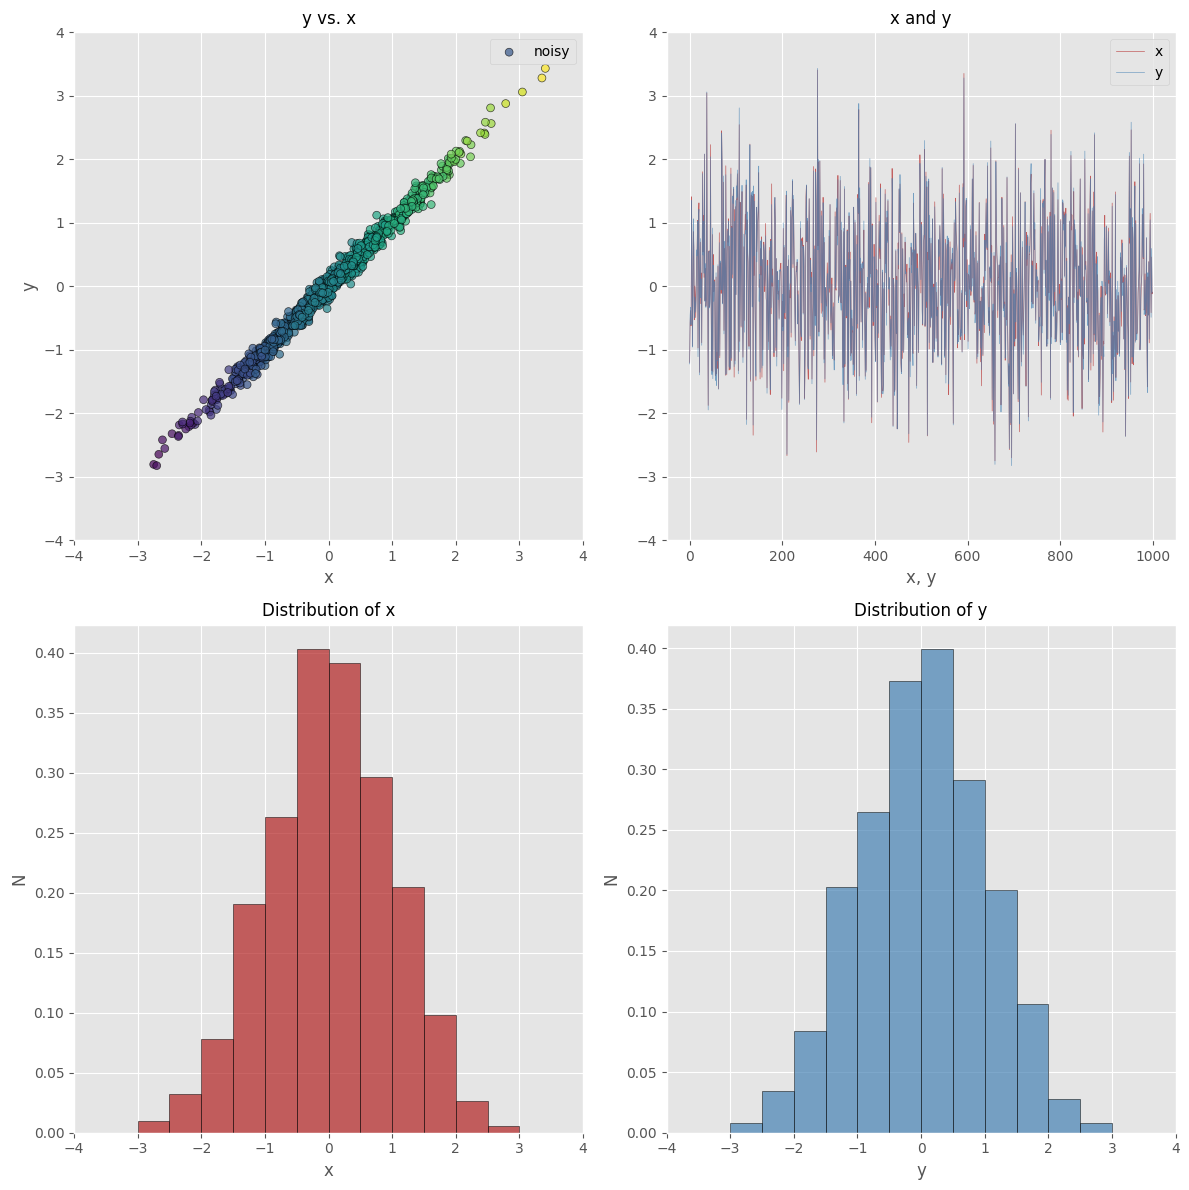

In [54]:
plt.figure(figsize=(12,12))

# First subplot
ax1 = plt.subplot(2, 2, 1)

# Note, that plt.plot and others use current axes
# We do not need to use `ax1` directly (although we can)
plt.scatter(x, y, marker='o', alpha=0.7, s=32, c=colors, edgecolor='k', label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x", fontsize=12)

# Second subplot
ax2 = plt.subplot(2, 2, 2)
plt.plot(x, c='firebrick', linewidth=0.5, alpha=0.7, label='x')
plt.plot(y, c='steelblue', linewidth=0.5, alpha=0.7, label='y')
plt.xlabel('x, y')
plt.grid(True)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("x and y", fontsize=12)

# Third subplot
plt.subplot(2, 2, 3)
plt.hist(x, bins=12, range=(-3, 3), density=True, alpha=0.7, color='firebrick', edgecolor='k')
plt.xlabel('x')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.title("Distribution of x", fontsize=12)

# Fourth subplot
plt.subplot(2, 2, 4)
plt.hist(y, bins=12, range=(-3, 3), density=True, alpha=0.7, color='steelblue', edgecolor='k')
plt.xlabel('y')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.title("Distribution of y", fontsize=12)

plt.tight_layout();

Depending on window size of your browser, you may need to double click on the image, since Jupyter places images into available width.

We can also add a super title if needed with `plt.suptitle`.

# Seaborn

Matplotlib is a somewhat low-level package. To create complex plots we have to do a lot of things manually. Seaborn is a wrapper on top of Matplotlib, which allows for simpler plotting of complex plots. Import convention is:

In [55]:
import seaborn as sns

For example, instead of plotting a histogram with Matplotlib, we can do it with Seaborn:

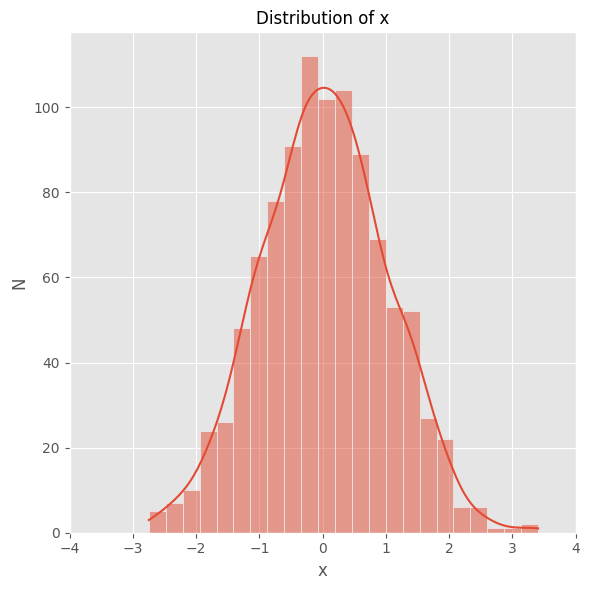

In [56]:
plt.figure(figsize=(6,6))
sns.histplot(x, kde=True)
plt.xlabel('x')
plt.ylabel('N')

plt.grid(True)

plt.xlim(-4, 4)

plt.title("Distribution of x", fontsize=12)
plt.tight_layout();